<table>
    <tr>
      <td>
      <img src='https://www.ideal-ist.eu/sites/default/files/2018-10/logo_quantum_flagship.jpg' width=450>
      </td>
      <td>
      <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Logo_UniJena.svg/1200px-Logo_UniJena.svg.png' width=450>
      </td>
      <td>
      <img src='https://www.akc.ac.cy/images/2022/03/Funded-by-the-European-Union.png' width=450>
      </td>
     </tr>
</table>

<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Quantum Computing, Summer 2022</h1>
<h2 style="text-align: center;"><a href="https://qt.eu/">European Union Quantum Flagship /</a> <a href="https://qtom.qtedu.eu/">QTEdu Quantum Technology Open Master</a></h2>
<h2 style="text-align: center;"><a href="https://www.uni-jena.de/en">Friedrich Schiller University Jena</a></h2>
<h3><em>Quantum Entanglement</em></h3>
<h3>Anastasiia Andriievska</h3>

</div>

In [7]:
import numpy as np
from matplotlib import pyplot as plt

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, Aer, IBMQ, transpile, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<h3>Entanglement</h3>
(a) Implement a quantum circuit, creating a pair of entangled qubits in the $|\phi^+\rangle$ state 

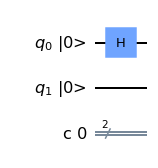

In [2]:
# First, we define how many qubits we want to implement
nqubit = 2
QR = QuantumRegister(nqubit, 'q')  
CR = ClassicalRegister(nqubit, 'c')

# To create quantum circuit where the syntax is QuantumCircuit(quantum_register,classical_register)
qc = QuantumCircuit(QR,CR)

qc.h(0)  # To apply H gate at the 0th qubit
qc.draw(initial_state=True)

In [8]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

The result shows that our final states are now $|0\rangle \otimes|+> = \frac{1}{\sqrt2}|00> + \frac{1}{\sqrt2}|01> + 0 |10> + 0 |11>$.<br>We then need to have a gate to flip |01> to |11>

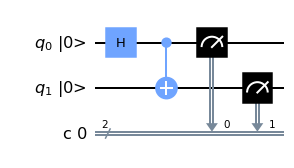

In [9]:
qc2 = QuantumCircuit(QR,CR)

# Apply CNOT
qc2.h(0)  # To apply H gate at the 0th qubit
qc2.cx(0,1)  # (target_qubit, control_qubit) swap when control_qubit = 1
qc2.measure(0, 0)
qc2.measure(1, 1)
qc2.draw(initial_state=True)

Job Status: job has successfully run
{'00': 517, '11': 483}


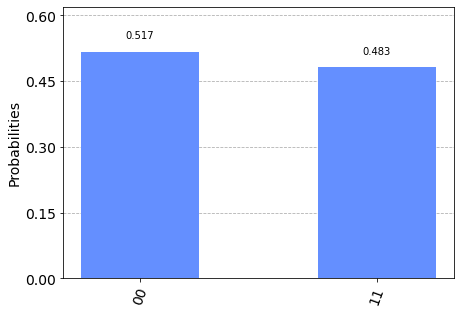

In [10]:
simulator = Aer.get_backend('aer_simulator')
job = execute(qc2, simulator, shots=1000)
job_monitor(job)  # display the job's status
result = job.result()
counts = result.get_counts() 
print(counts)
plot_histogram(counts)

Now we have a pair of entangled Qubits in the $|\phi^+\rangle$ state.

(b) Implement a Measurement in the pair of photons in a arbitrary base of type
$|\psi_{A}\rangle = \cos\phi |0\rangle + \sin\phi |1\rangle$ and $|\psi_{B}\rangle = \sin\phi |0\rangle - \cos\phi |1\rangle$. Hint: use a rotation around the L/R axis before the measurement.

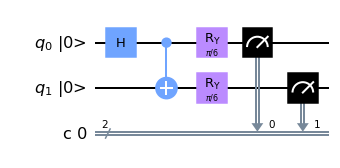

In [11]:
qc_b = QuantumCircuit(QR,CR) 

# Apply H-gate to the first:
qc_b.h(0)

# Apply CNOT
qc_b.cx(0,1)
qc_b.ry(np.pi/6, QR)
qc_b.measure(0, 0)
qc_b.measure(1, 1)
qc_b.draw(initial_state=True)

(c) Show that the results obtained for the measurement have 50/50 probabilities for each of the
individual QuBits, independent of the selection of the measurement angle $\phi$.<br><br>
(d) Show that the results obtained for the measurement are perfectly correlated between the
two QuBits, independent of the selection of the measurement angle $\phi$.

Job Status: job has successfully run
{'11': 480, '00': 520}


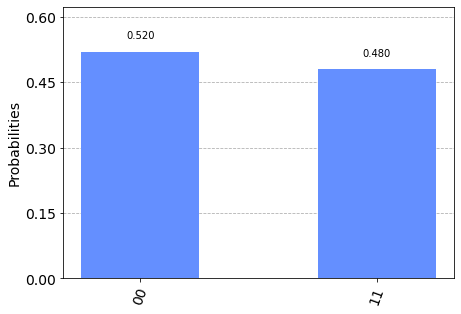

In [12]:
simulator = Aer.get_backend('aer_simulator')
job = execute(qc_b, simulator, shots=1000)
job_monitor(job)  # display the job's status
result = job.result()
counts = result.get_counts() 
print(counts)
plot_histogram(counts)

This result indicates that we always have 50/50 prob regardless of the selection of measurement angle.<br> If try changing the angle in qc_b.ry, one would still get 50/50 prob.<br>
In the meantime, we also always get |00> or |11> states, implying that these two qubits are perfectly correlated.<br>It is based on the fact that this bell state is maximally entangled.

(e) Repeat the latter experiment on a real Quantum computer. 

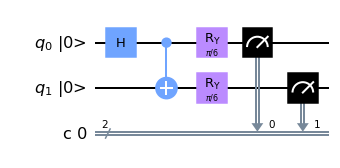

In [14]:
qc_e = QuantumCircuit(2,2) 

# Apply H-gate to the first:
qc_e.h(0)

# Apply CNOT
qc_e.cx(0,1)
qc_e.ry(np.pi/6, QR)
qc_e.measure(0, 0)
qc_e.measure(1, 1)
qc_e.draw(initial_state=True)

<h3>Submit to the quantum computer:</h3>

In [8]:
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibm_nairobi


In [16]:
### Alternatively, one can also check which machine you can use by the below command
print(provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

In [9]:
## If you want to use ibmq_belem, type below
device = provider.backend.ibmq_belem 
## If you want to use ibmq_santiago, type below
#device = provider.backend.ibmq_santiago

device  # Just to look at the details of machine

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
# converting set of gate operations to another ones with the aim to make the circuit
# implementable on any machine with having different architecture
# normally used when we have many complicated circuits 
qc_transpiled2 = transpile(qc_e, device)

# If you want to select the specific machine, simply comment device = least_busy(.....) and uncomment device = provider.backend.ibmq_quito
job2 = device.run(qc_transpiled2)
job_monitor(job2, interval=2)

Job Status: job has successfully run


In [ ]:
results = job2.result()
answer = results.get_counts()
plot_histogram(answer)

When running by quantum computer, 01 and 10 are present as the noise since all quantum computers are noisy and this noise will manifest itself in errors within the calculation. The way to reduce the noise is to exploit error correction technique.

(f) Show that the 2-Qubits-Correlations break down, if one Qubits is measured (evesdropped)
after the entanglement.

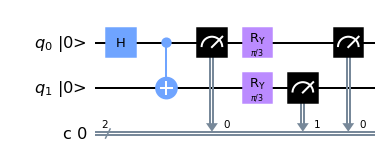

In [23]:
qc_f = QuantumCircuit(QR,CR) 

# Apply H-gate to the first:
qc_f.h(0)

# Apply CNOT
qc_f.cx(0,1)
qc_f.measure(0, 0)  # Hey I am Eve. I am here after the entanglement :P
qc_f.ry(np.pi/3, QR)

qc_f.measure(0, 0)
qc_f.measure(1, 1)
qc_f.draw(initial_state=True)

Job Status: job has successfully run
{'01': 175, '10': 188, '00': 317, '11': 320}


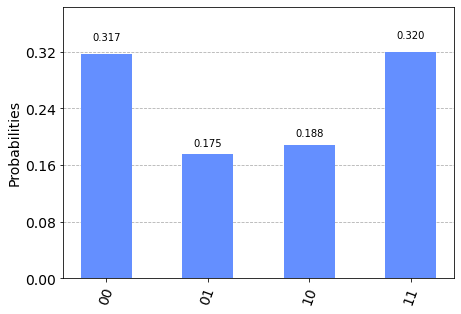

In [24]:
simulator = Aer.get_backend('aer_simulator')
job = execute(qc_f, simulator, shots=1000)
job_monitor(job)  # display the job's status
result = job.result()
counts = result.get_counts() 
print(counts)
plot_histogram(counts)

As seen, 01 and 10 are obviously present, so those 2 qubits are not correlated anymore.

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table

Copyright 2022 Anastasiia Andriievska

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License